In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [4]:
iris_ld = load_iris()
iris = pd.DataFrame(data=iris_ld.data, columns=iris_ld.feature_names)
iris['target'] = iris_ld.target

In [3]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(9,), max_iter=1000, random_state=42)

In [5]:
mlp.fit(X_train, y_train)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(9,), max_iter=1000, random_state=42)

In [6]:
y_pred = mlp.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


In [8]:
air_df = pd.read_csv("Airplane.csv")
air_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
air_df['satisfaction'] = air_df['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [10]:
def spectrum_to_descrete_mapper(value: int, _range, chunk_number: int = 10):
  """
  calculates the location of the  in the range <_range>
  and returns a number between 0 and chunk_number -1
  """
  percent = value / _range * chunk_number
  return math.floor(percent)

In [11]:
max_flight_distance = max(air_df["Flight Distance"])
min_flight_distance = min(air_df["Flight Distance"])
flight_distance_range = max_flight_distance - min_flight_distance
air_df["Flight Distance"] = air_df['Flight Distance'].map(lambda value: spectrum_to_descrete_mapper(value, flight_distance_range, 10))

In [12]:
air_df["Customer Type"] = air_df["Customer Type"].map({"Loyal Customer": 1, "disloyal Customer": 0})
air_df["Gender"] = air_df["Gender"].map({"Male": 1, "Female": 0})

In [13]:
max_age = max(air_df['Age'])
min_age = min(air_df['Age'])
age_range = max_age - min_age
air_df["Age"] = air_df["Age"].map(lambda value: spectrum_to_descrete_mapper(value, age_range, 10))

In [14]:
air_df["Type of Travel"] = air_df["Type of Travel"].map({"Personal Travel": 1, "Business travel": 0})

In [15]:
air_df["Class"] = air_df["Class"].map({"Eco Plus": 0, "Business": 1, "Eco": 2})

In [16]:
max_delay = max(air_df['Departure Delay in Minutes'])
min_delay = min(air_df['Departure Delay in Minutes'])
delay_range = max_delay - min_delay
air_df["Departure Delay in Minutes"] = air_df["Departure Delay in Minutes"]\
.map(lambda value: spectrum_to_descrete_mapper(value, delay_range, 5))

In [17]:
arrival_delay_in_minutes_mean = air_df["Arrival Delay in Minutes"].mean()
air_df["Arrival Delay in Minutes"] = air_df["Arrival Delay in Minutes"]\
.map(lambda value: value if value > 0 else arrival_delay_in_minutes_mean)

In [18]:
max_delay = max(air_df['Arrival Delay in Minutes'])
min_delay = min(air_df['Arrival Delay in Minutes'])
delay_range = max_delay - min_delay
air_df["Arrival Delay in Minutes"] = air_df["Arrival Delay in Minutes"]\
.map(lambda value: spectrum_to_descrete_mapper(value, delay_range, 5))

In [19]:
X = air_df.iloc[:, :-1].values
y = air_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 5), random_state=42)

In [21]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20, 5), random_state=42)

In [22]:
y_pred = mlp.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8337904816900052


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 50), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5650353688465425


In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5636398633367018


In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20, 10), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8280159761320437


In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50,50,50,50,50, 10), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5636398633367018


In [28]:
mx = 0
mx_l = None
for i in range(5, 30):
    for j in range(5, 15):
        hl = (i, i, i, j)
        mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"i: {i}")
        print(f"j: {j}")
        print("----------")
        if accuracy>mx:
            print(accuracy)
            mx = accuracy
            mx_l = hl

i: 5
j: 5
----------
0.5636398633367018
i: 5
j: 6
----------
i: 5
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 8
----------
i: 5
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 11
----------
0.5637361050960011


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
j: 14
----------
i: 7
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 6
----------
0.6692170732880998


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 8
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 9
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 10
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 11
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 9
----------
0.6712381502333863


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 12
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 13
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 14
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 15
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 16
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 5
----------
i: 17
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 17
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 18
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 19
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 20
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 21
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 22
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 23
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 24
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 5
----------
i: 25
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 25
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 26
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 27
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 13
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 28
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 5
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 7
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 9
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 10
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 11
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 12
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 29
j: 13
----------
i: 29
j: 14
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(17, 17, 17, 5), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8721909436504499


In [30]:
mx = 0
mx_l = None
for i in range(4, 9):
  hl = (i ** 2, (i-1)**2, (i-2)**2)
  mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"i: {i}")
  if accuracy>mx:
    print(accuracy)
    mx = accuracy
    mx_l = hl

  print("----------")

i: 4
0.5636398633367018
----------
i: 5
0.772484481016313
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 7
----------
i: 8
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [31]:
mx = 0
mx_l = None
for i in range(2, 7):
  hl = (i ** 2, (i+1)**2, (i+2)**2)
  mlp = MLPClassifier(hidden_layer_sizes=hl, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"i: {i}")
  if accuracy>mx:
    print(accuracy)
    mx = accuracy
    mx_l = hl

  print("----------")

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 2
0.5623405995861605
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 3
0.6133968528944709
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 4
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


i: 5
----------
i: 6
----------


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 25, 36,), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5641691930128483


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(36, 25, 16,), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5651316106058418


In [214]:
def predict_function2(X, y, hidden_layer_sizes, max_iter, random_state=42, test_size=0.7, noise=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)

    if noise is not None:
        if y_train.shape != noise.shape:
            raise ValueError("noise shape should be the same as y_train")
        y_train = y_train + noise
        mlp.fit(X_train, y_train)

    else:
        mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    fig, ax = plt.subplots()
    
    ax.plot(X, y, 'b', label='Actual', marker=".", linestyle="None")
    
    ax.plot(X_test, y_pred, 'r', label='Predicted', marker=".", linestyle="None")
    
    ax.plot(X_test, y_test, "g", label="Test data", marker=".", linestyle="None")
    
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')
    
    ax.legend()
    
    plt.show()

    return mlp
    

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.0013505556303535842


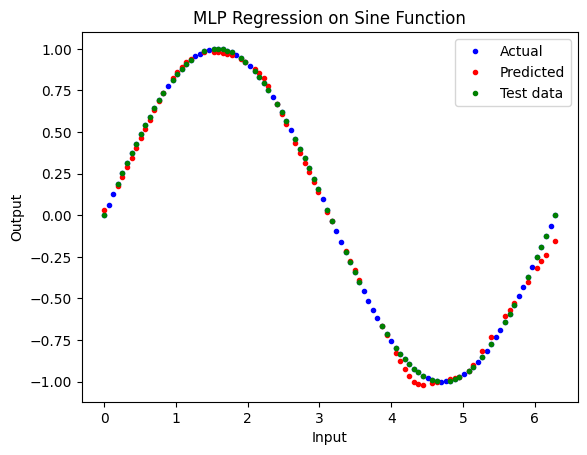

In [127]:
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(X)

mlp = predict_function2(X, y, (100, 81, 64, 49), 100000)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.009271124469153296


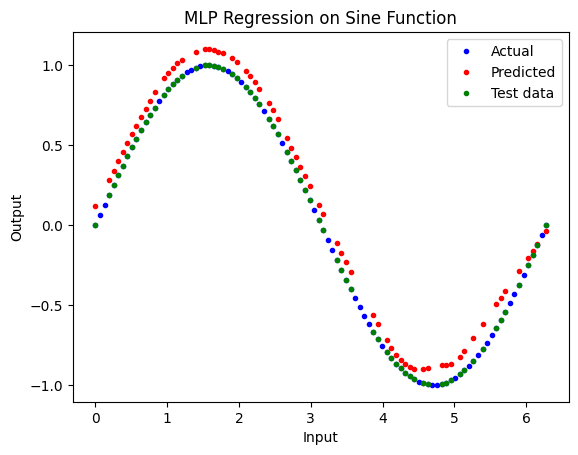

In [134]:
noise = np.zeros((int(X.shape[0]*0.3), 1)) + 0.1

mlp = predict_function2(X, y, (100, 81, 64, 49), 100000, noise=noise, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.003706697761797408


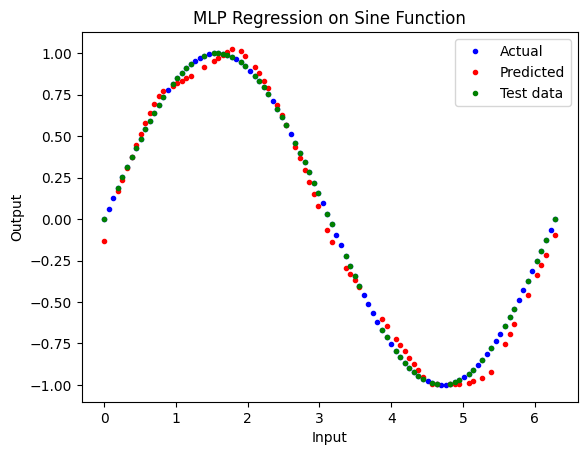

In [162]:
noise_array = np.random.normal(loc=0, scale=0.2, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (100, 81, 64, 49), 100000, noise=noise_array, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.005537773789855156


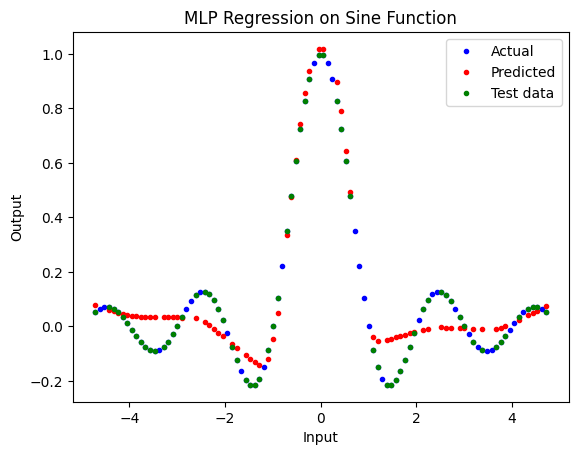

MLPRegressor(hidden_layer_sizes=(100, 81, 64, 49, 36, 25, 16), max_iter=100000,
             random_state=42)

In [163]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 100).reshape(-1, 1)
y = np.sinc(X)

predict_function2(X, y, (100, 81, 64, 49, 36, 25, 16), 100000)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.011202348890947974


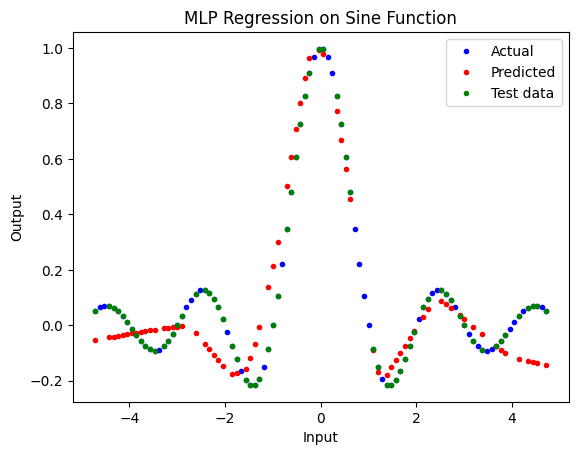

In [178]:
noise_array = np.random.normal(loc=0, scale=0.2, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (100, 81, 64, 49), 100000, noise=noise_array, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00010394731881801843


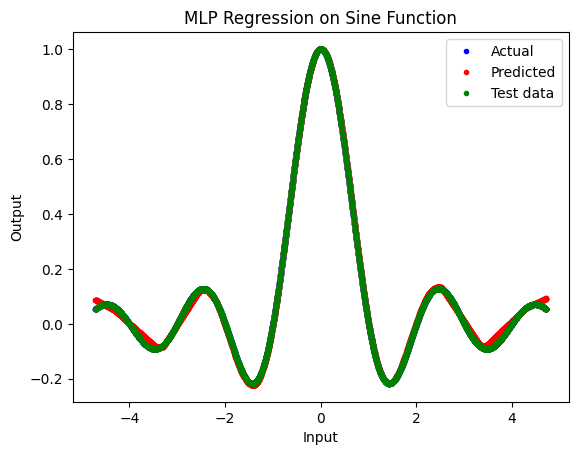

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=100000,
             random_state=42)

In [191]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 5000).reshape(-1, 1)
y = np.sinc(X)

predict_function2(X, y, (1024, 512, 256, 128,), 100000)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.004186639428973615


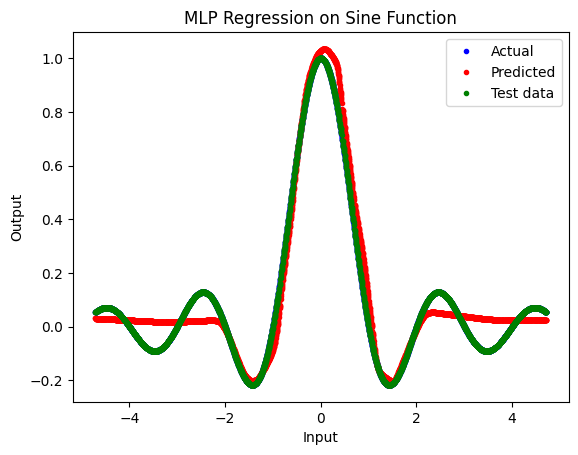

In [192]:
noise_array = np.random.normal(loc=0, scale=0.2, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (1024, 512, 256, 128,), 100000, noise=noise_array, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.0069582476794696375


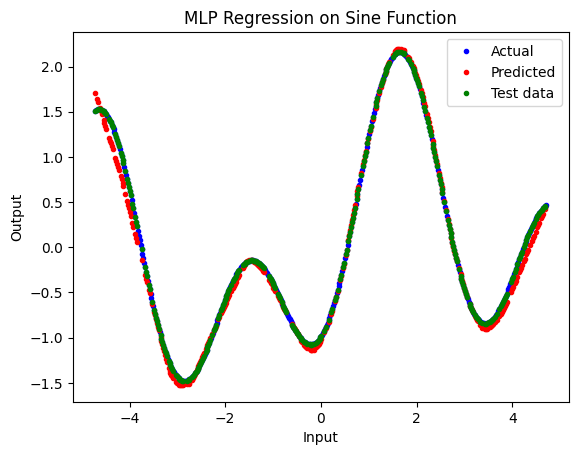

MLPRegressor(hidden_layer_sizes=(100, 81, 64, 49, 36, 25, 16), max_iter=100000,
             random_state=42)

In [193]:
X = np.linspace(-3/2*np.pi, 3/2*np.pi, 500).reshape(-1, 1)
y = np.sin(X) + np.cos(2*X+3) + X/np.pi ** 2

predict_function2(X, y, (100, 81, 64, 49, 36, 25, 16), 100000)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.02960239291264662


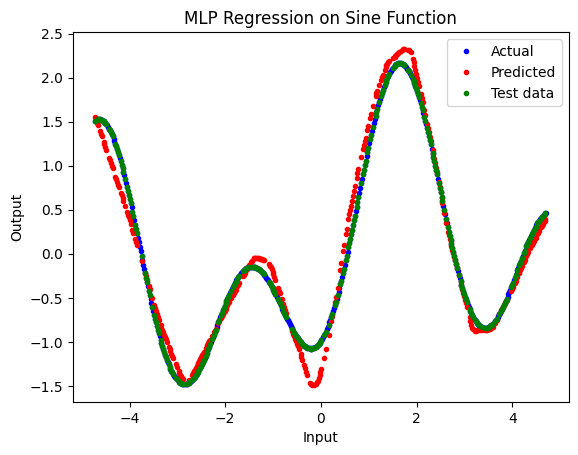

In [199]:
noise_array = np.random.normal(loc=0, scale=0.5, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (100, 81, 64, 49, 36, 25, 16), 100000, noise=noise_array, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 127.92486821417039


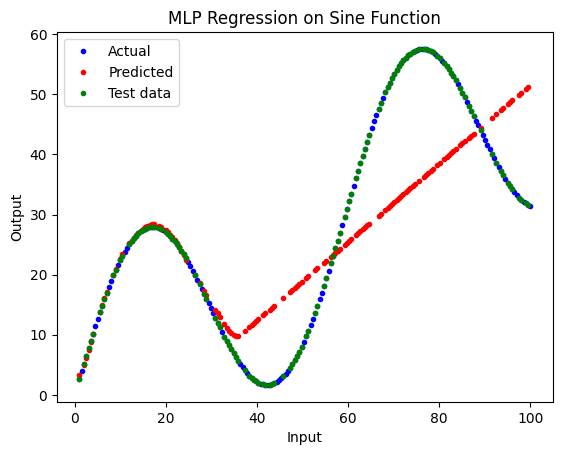

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [200]:
X = np.linspace(1, 100, 200).reshape(-1, 1)
y = X / 2 + 20 * np.sin(X / (np.pi * 3))

predict_function2(X, y, (1024, 512, 256, 128), 200)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.1994486327791447


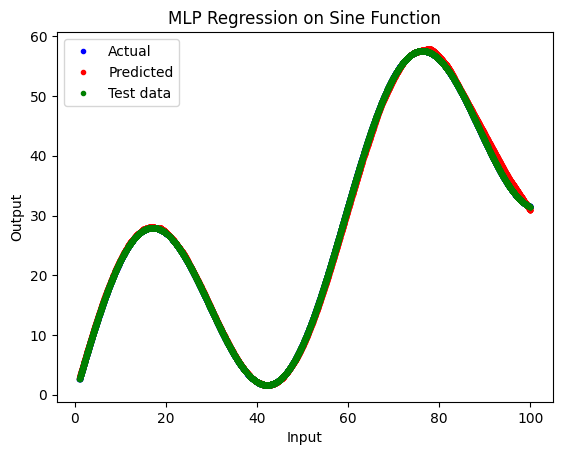

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [202]:
X = np.linspace(1, 100, 10000).reshape(-1, 1)
y = X / 2 + 20 * np.sin(X / (np.pi * 3))

predict_function2(X, y, (1024, 512, 256, 128), 200)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 2.5933982771592126


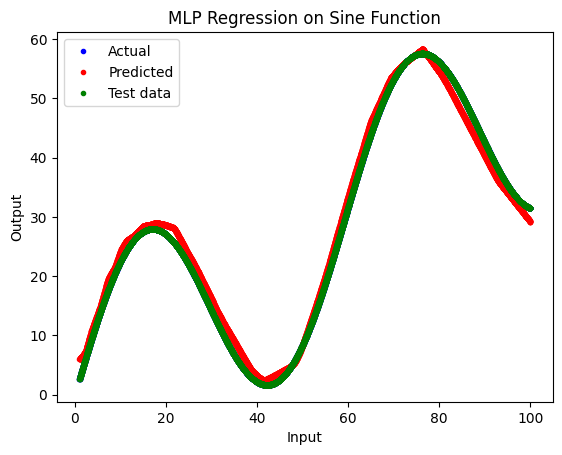

In [205]:
noise_array = np.random.normal(loc=0, scale=5, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (1024, 512, 256, 128), 100000, noise=noise_array, test_size=0.7)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.7831331766149618


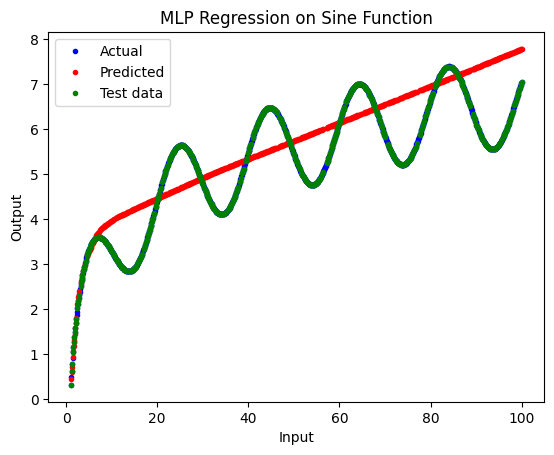

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [206]:
X = np.linspace(1, 100, 1000).reshape(-1, 1)
y = np.log2(X) + np.sin(X / np.pi)

predict_function2(X, y, (1024, 512, 256, 128), 200)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.020099907090040343


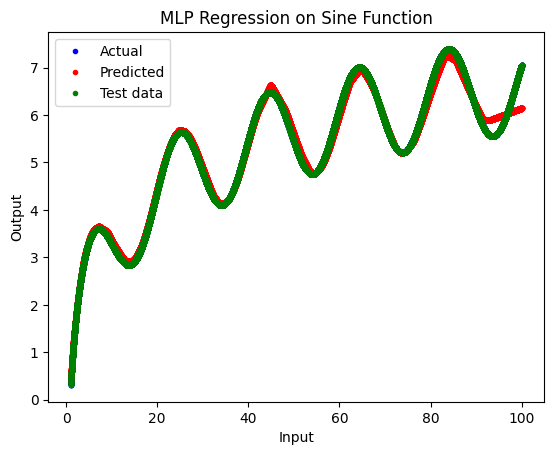

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [207]:
X = np.linspace(1, 100, 50000).reshape(-1, 1)
y = np.log2(X) + np.sin(X / np.pi)

predict_function2(X, y, (1024, 512, 256, 128), 200)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.32480869886834046


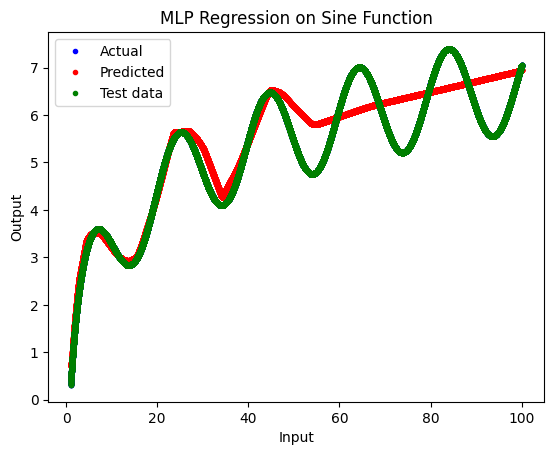

In [210]:
noise_array = np.random.normal(loc=0, scale=1.5, size=(int(X.shape[0]*0.3), 1))

mlp = predict_function2(X, y, (1024, 512, 256, 128), 200, noise=noise_array, test_size=0.7)

0.0003895398658531748


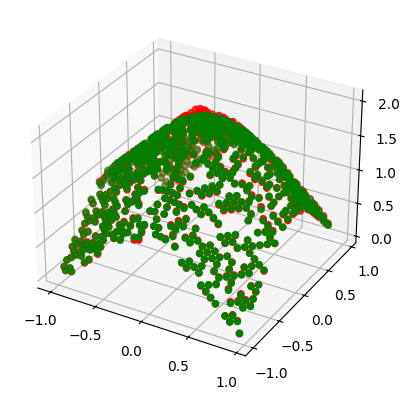

In [215]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor


def z(x,y):
    return np.sinc(x) + np.sinc(y)

x = np.arange(-1,1,0.05)
xy = [(j,k) for j in x for k in x]
out = [z(p[0],p[1]) for p in xy]

x_train, x_test, y_train, y_test = train_test_split(xy, out, test_size=0.5, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])


x1_valz = np.array([p[0] for p in x_test])
x2_valz = np.array([p[1] for p in x_test])

mlp = MLPRegressor(
    hidden_layer_sizes=(20,),
    max_iter=3000,
    tol=0,
)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

ax.scatter(x1_valz, x2_valz, predictions, label="Predicted", c='red')
ax.scatter(x1_valz, x2_valz, y_test, label="Test Data", c='green')

plt.show()

5408.169859219582


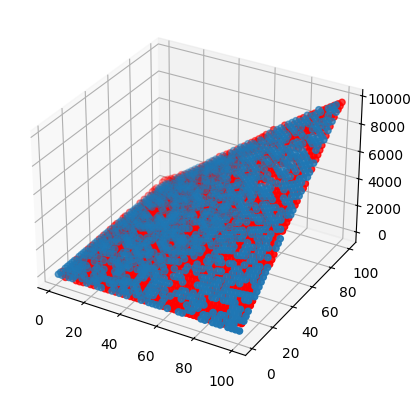

In [222]:
def z(x,y):
    return x * y

x = np.linspace(1, 100, 50)
xy = [(j,k) for j in x for k in x]
out = [z(p[0],p[1]) for p in xy]

x_train, x_test, y_train, y_test = train_test_split(xy, out, test_size=0.5, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])


x1_valz = np.array([p[0] for p in x_test])
x2_valz = np.array([p[1] for p in x_test])


ax.scatter(x1_vals, x2_vals, y_train)

mlp = MLPRegressor(
    hidden_layer_sizes=(32, 16),
    max_iter=3000,
    tol=0,
)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

ax.scatter(x1_valz, x2_valz, predictions, c='red')

plt.show()

0.15742791152625363


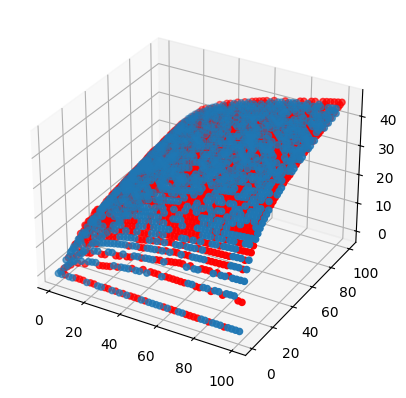

In [223]:
def z(x,y):
    return np.log2(x) * np.log2(y)

x = np.linspace(1, 100, 50)
xy = [(j,k) for j in x for k in x]
out = [z(p[0],p[1]) for p in xy]

x_train, x_test, y_train, y_test = train_test_split(xy, out, test_size=0.5, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])


x1_valz = np.array([p[0] for p in x_test])
x2_valz = np.array([p[1] for p in x_test])


ax.scatter(x1_vals, x2_vals, y_train)

mlp = MLPRegressor(
    hidden_layer_sizes=(32, 16),
    max_iter=3000,
    tol=0,
)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

ax.scatter(x1_valz, x2_valz, predictions, c='red')

plt.show()

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 2.533714014218217


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


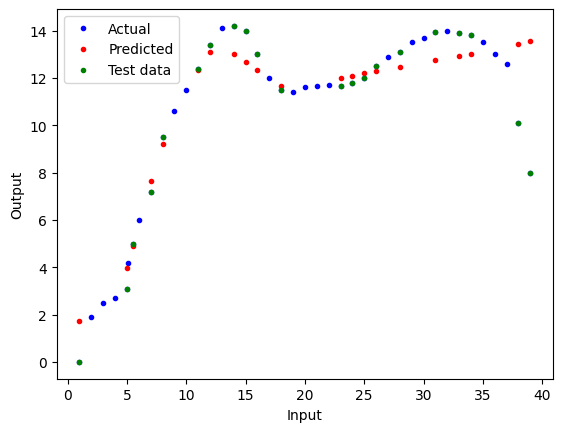

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [226]:
X = np.array([
    1, 2, 3, 4, 5, 5.1, 5.5, 6, 7, 8, 9, 10, 11, 12, 13,
    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
    27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
]).reshape(-1, 1)

Y = np.array([
    0, 1.9, 2.5, 2.7, 3.1, 4.2, 5, 6, 7.2, 9.5, 10.6, 11.5,
    12.4, 13.4, 14.1, 14.2, 14, 13, 12, 11.5, 11.4, 11.6, 11.65,
    11.7, 11.67, 11.8, 12, 12.5, 12.9, 13.1, 13.5,
    13.7, 13.95, 14, 13.9, 13.8, 13.5, 13, 12.6, 10.1,
    8
]).reshape(-1, 1)


# X, y, hidden_layer_sizes, max_iter, random_state=42, test_size=0.5, noise=None
predict_function2(X, Y, (1024, 512, 256, 128), 200, test_size=0.5)

In [227]:
def interpolation(X, number_of_points):

  new_x = []
  for i in range(0, len(X)):
    if i + 1 == len(X):
      continue

    new_x.append(X[i])

    step = (X[i+1] - X[i]) / number_of_points
    temp = X[i]
    for j in range(number_of_points - 1):
      temp = temp + step
      new_x.append(temp)

    new_x.append(X[i+1])

  return np.array(new_x)

In [228]:
new_x = interpolation(X, 4)
new_y = interpolation(Y, 4)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1.122508534338904


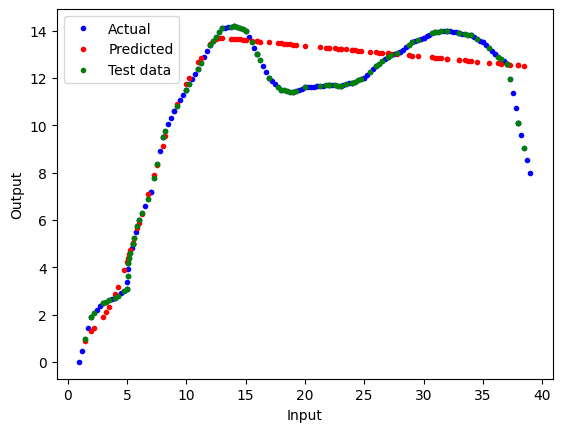

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [229]:
predict_function2(new_x, new_y, (1024, 512, 256, 128), 200, test_size=0.5)

In [230]:
new_x = interpolation(X, 200)
new_y = interpolation(Y, 200)

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.27575976111742506


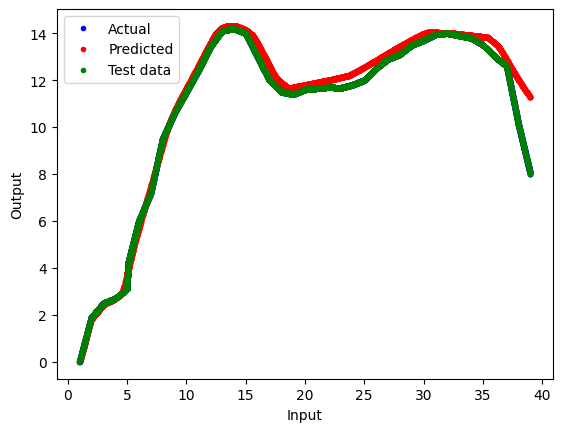

MLPRegressor(hidden_layer_sizes=(1024, 512, 256, 128), random_state=42)

In [231]:
predict_function2(new_x, new_y, (1024, 512, 256, 128), 200, test_size=0.5)

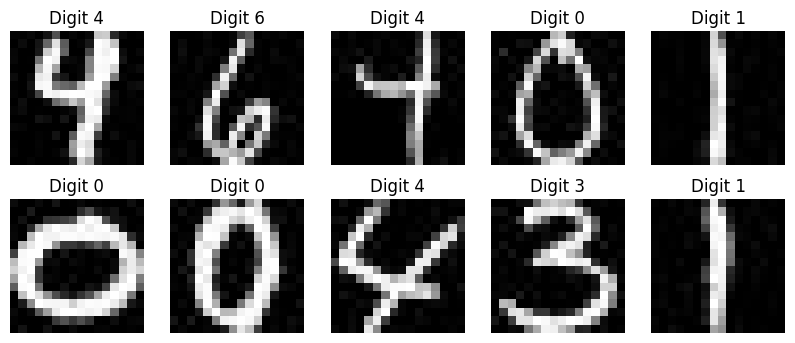

In [28]:
import os
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from skimage import io, color, transform

# Specify the path to your images directory
images_dir = "./images"

images = []
labels = []

for filename in os.listdir(images_dir):
    img_path = os.path.join(images_dir, filename)
    img = io.imread(img_path)
    img = transform.resize(img, (16, 16))  # Resize to 16x16 pixels
    images.append(img.flatten())  # Flatten the image
    labels.append(int(filename[0]))

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images[i].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Digit {labels[i]}")
    axes[i].axis('off')

plt.show()

In [29]:
X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100}')

Test Accuracy: 94.74272930648769


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=10, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100}')

Test Accuracy: 94.68680089485458


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), max_iter=10, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100}')

Test Accuracy: 95.52572706935123


/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), max_iter=100, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100}')

Test Accuracy: 96.47651006711409


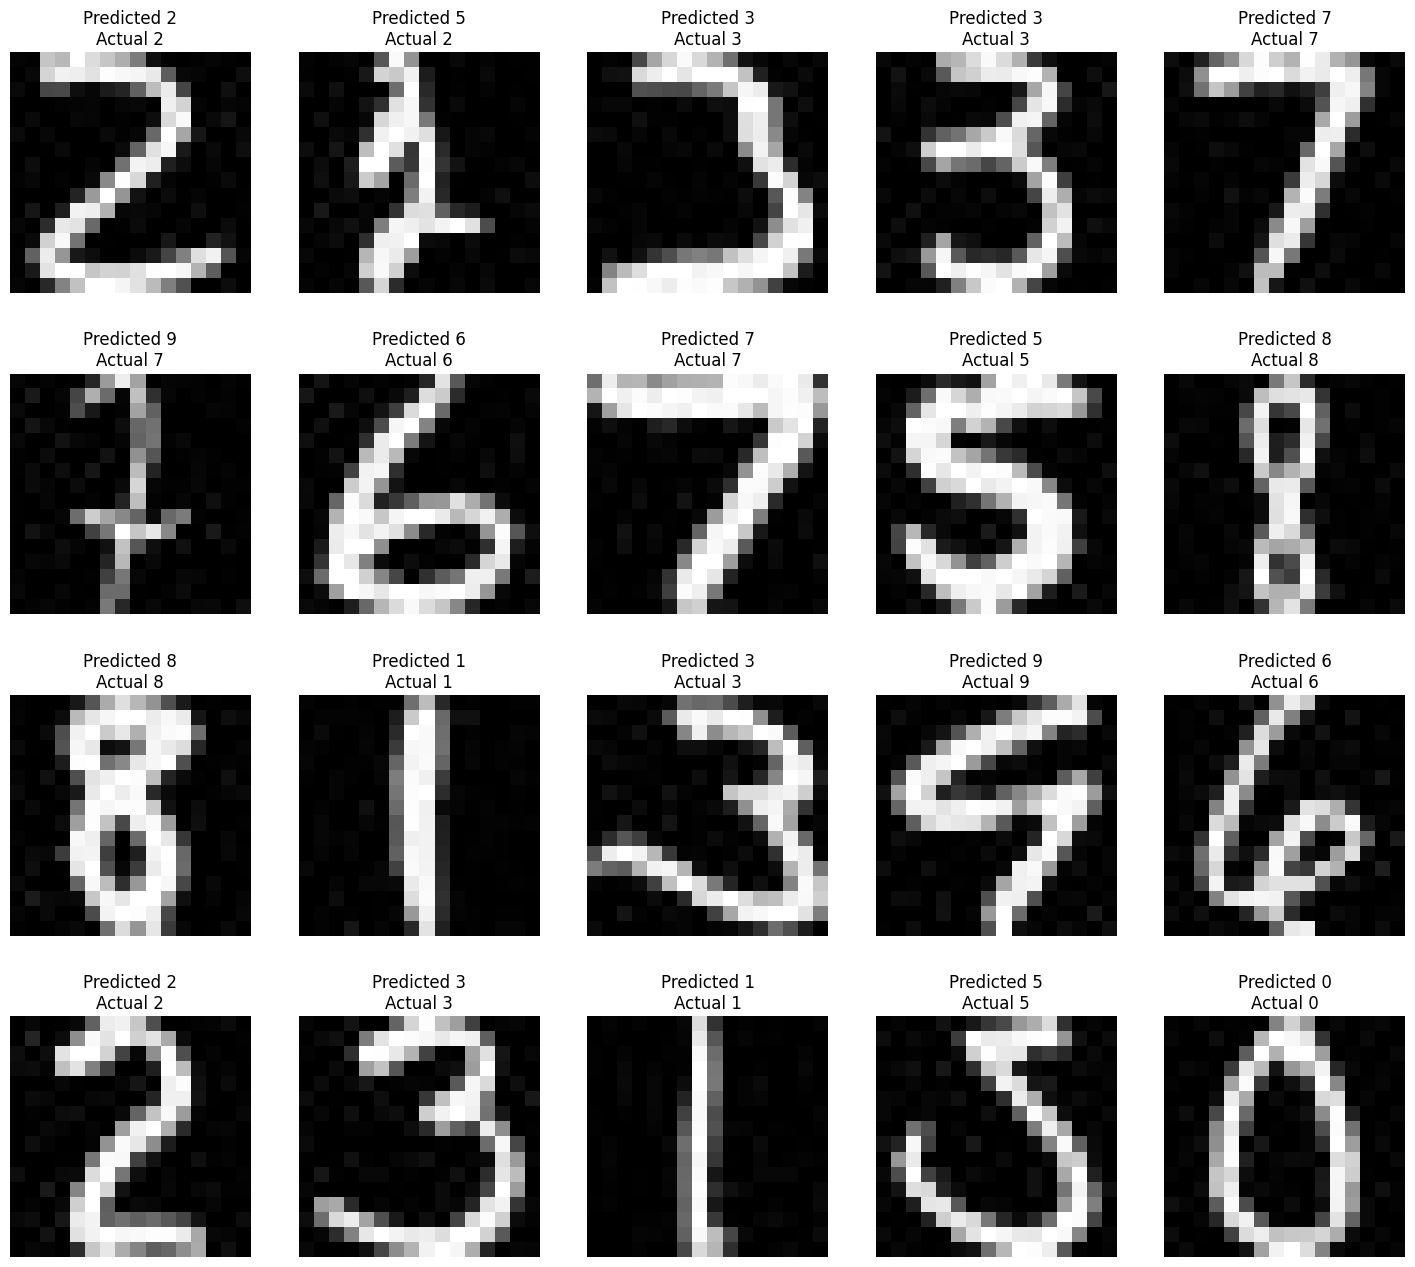

In [33]:
fig, axes = plt.subplots(4, 5, figsize=(18, 16))
axes = axes.ravel()

for i in range(0, 20):
    axes[i].imshow(X_test[i].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Predicted {y_pred[i]}\nActual {y_test[i]}")
    axes[i].axis('off')

plt.show()

In [34]:
from sklearn.model_selection import cross_val_score

X = np.array(images)
y = np.array(labels)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), max_iter=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {}%".format(np.mean(cv_scores) * 100))

/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mohsen/dev/AI-course/Neural-Network/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.96588367 0.95525727 0.97315436 0.94407159 0.96866256]
Mean Accuracy: 96.1405890666997%


In [37]:
clean_images_dir = "./images"
noisy_img_path = "./noisy_images"

def add_noise(image, noise_factor=0.1):
    """
    Add random noise to an image.
    """
    noise = np.random.normal(loc=0, scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

clean_images = []

for filename in os.listdir(clean_images_dir):
    img_path = os.path.join(clean_images_dir, filename)
    img = io.imread(img_path)
    img = transform.resize(img, (16, 16))  # Resize to 16x16 pixels
    clean_images.append(img)
    
    noisy_img = add_noise(img)

    noisy_img_uint8 = (noisy_img * 255).astype(np.uint8)
    
    noisy_img_path = os.path.join(noisy_images_dir, filename)
    io.imsave(noisy_img_path, noisy_img_uint8)

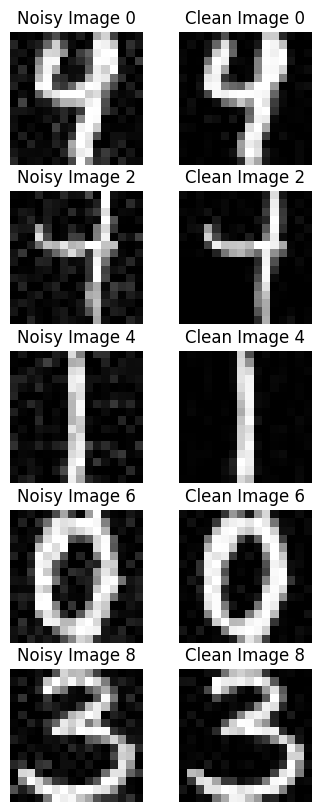

In [38]:
clean_images_dir = "./images"
noisy_images_dir = "./noisy_images"
noisy_images = []

for filename in os.listdir(noisy_images_dir):
    img_path = os.path.join(noisy_images_dir, filename)
    img = io.imread(img_path)
    img = transform.resize(img, (16, 16))

    noisy_images.append(img)

fig, axes = plt.subplots(5, 2, figsize=(4, 10))
axes = axes.ravel()

for i in range(0, 10, 2):
    axes[i].imshow(noisy_images[i].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Noisy Image {i}")
    axes[i].axis('off')

    axes[i+1].imshow(clean_images[i].reshape(16, 16), cmap='gray')
    axes[i+1].set_title(f"Clean Image {i}")
    axes[i+1].axis('off')

plt.show()

In [39]:
len(noisy_images) == len(clean_images)

True

In [62]:
from skimage.metrics import peak_signal_noise_ratio

X = np.array(noisy_images)
Y = np.array(clean_images)

X_flat = X.reshape((len(X), -1))
Y_flat = Y.reshape((len(Y), -1))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y_flat, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(1024, 1024, 1024, 1024), max_iter=10000, random_state=42, activation="logistic")

mlp.fit(X_train, y_train)

denoised_images_flat = mlp.predict(X_test)

denoised_images = denoised_images_flat.reshape((-1, 16, 16))

psnr_scores = [peak_signal_noise_ratio(y_true.reshape((16, 16)), y_pred.reshape((16, 16)), data_range=1) for y_true, y_pred in zip(y_test, denoised_images)]

print(f"Mean PSNR: {np.mean(psnr_scores):.2f}")

Mean PSNR: 19.10


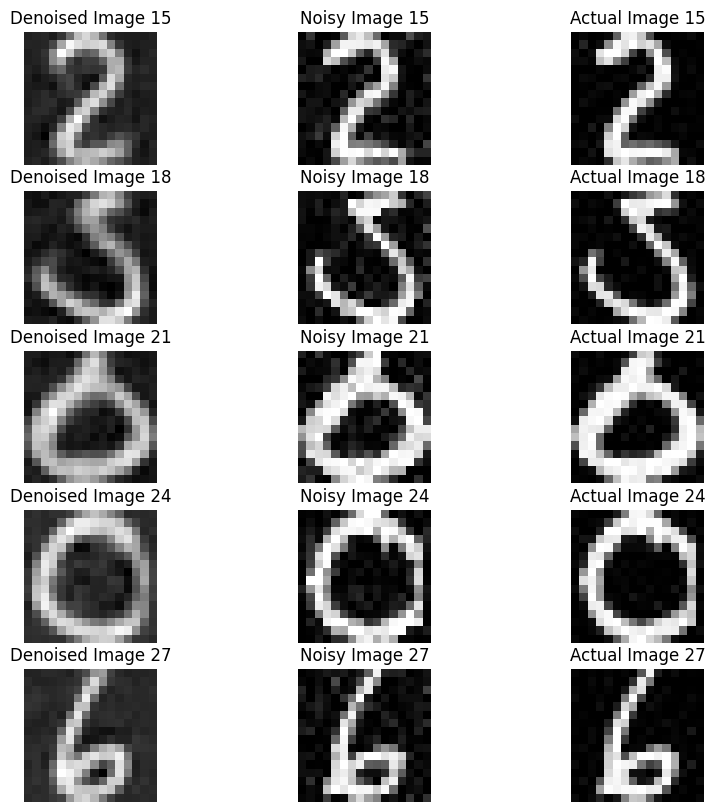

In [67]:
test_noisy_images = X_test.reshape((-1, 16, 16))
test_actual_images = y_test.reshape((-1, 16, 16))

fig, axes = plt.subplots(5, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(0, 15, 3):
    axes[i].imshow(denoised_images[i+15].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Denoised Image {i+15}")
    axes[i].axis('off')

    axes[i+1].imshow(test_noisy_images[i+15].reshape(16, 16), cmap='gray')
    axes[i+1].set_title(f"Noisy Image {i+15}")
    axes[i+1].axis('off')

    axes[i+2].imshow(test_actual_images[i+15].reshape(16, 16), cmap='gray')
    axes[i+2].set_title(f"Actual Image {i+15}")
    axes[i+2].axis('off')


plt.show()

In [70]:
from skimage.metrics import peak_signal_noise_ratio

X = np.array(noisy_images)
Y = np.array(clean_images)

X_flat = X.reshape((len(X), -1))
Y_flat = Y.reshape((len(Y), -1))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y_flat, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(4096, 2048, 1024), max_iter=1000, random_state=42, activation="logistic")

mlp.fit(X_train, y_train)

denoised_images_flat = mlp.predict(X_test)

denoised_images = denoised_images_flat.reshape((-1, 16, 16))

psnr_scores = [peak_signal_noise_ratio(y_true.reshape((16, 16)), y_pred.reshape((16, 16)), data_range=1) for y_true, y_pred in zip(y_test, denoised_images)]

print(f"Mean PSNR: {np.mean(psnr_scores):.2f}")

Mean PSNR: 20.11


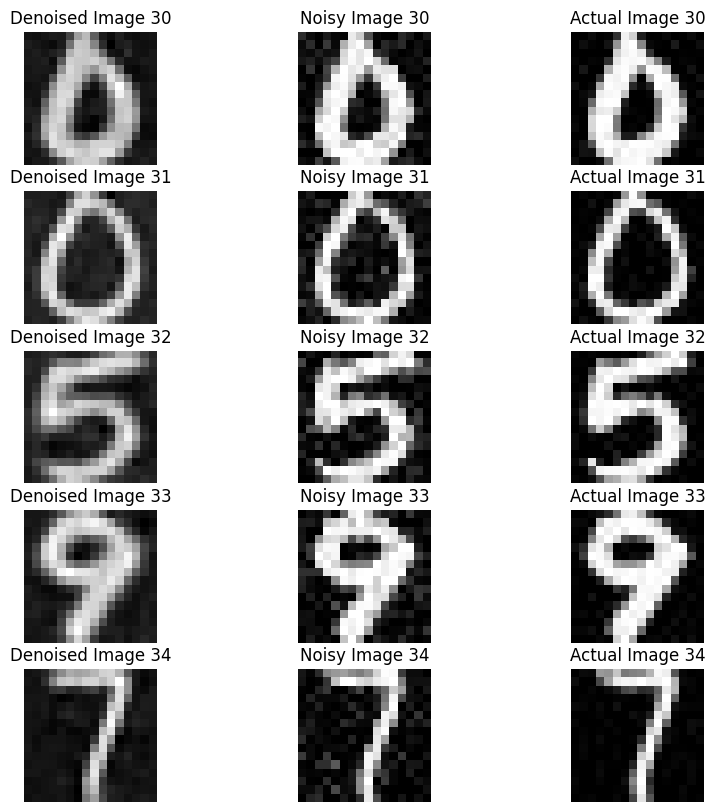

In [82]:
test_noisy_images = X_test.reshape((-1, 16, 16))
test_actual_images = y_test.reshape((-1, 16, 16))

fig, axes = plt.subplots(5, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(0, 15, 3):
    axes[i].imshow(denoised_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Denoised Image {i//3+30}")
    axes[i].axis('off')

    axes[i+1].imshow(test_noisy_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i+1].set_title(f"Noisy Image {i//3+30}")
    axes[i+1].axis('off')

    axes[i+2].imshow(test_actual_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i+2].set_title(f"Actual Image {i//3+30}")
    axes[i+2].axis('off')


plt.show()

In [97]:
from skimage.metrics import peak_signal_noise_ratio

X = np.array(noisy_images)
Y = np.array(clean_images)

X_flat = X.reshape((len(X), -1))
Y_flat = Y.reshape((len(Y), -1))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y_flat, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(256, 256, 256, 256, 256), max_iter=1000, random_state=42, activation="logistic")

mlp.fit(X_train, y_train)

denoised_images_flat = mlp.predict(X_test)

denoised_images = denoised_images_flat.reshape((-1, 16, 16))

psnr_scores = [peak_signal_noise_ratio(y_true.reshape((16, 16)), y_pred.reshape((16, 16)), data_range=1) for y_true, y_pred in zip(y_test, denoised_images)]

print(f"Mean PSNR: {np.mean(psnr_scores):.2f}")

Mean PSNR: 16.48


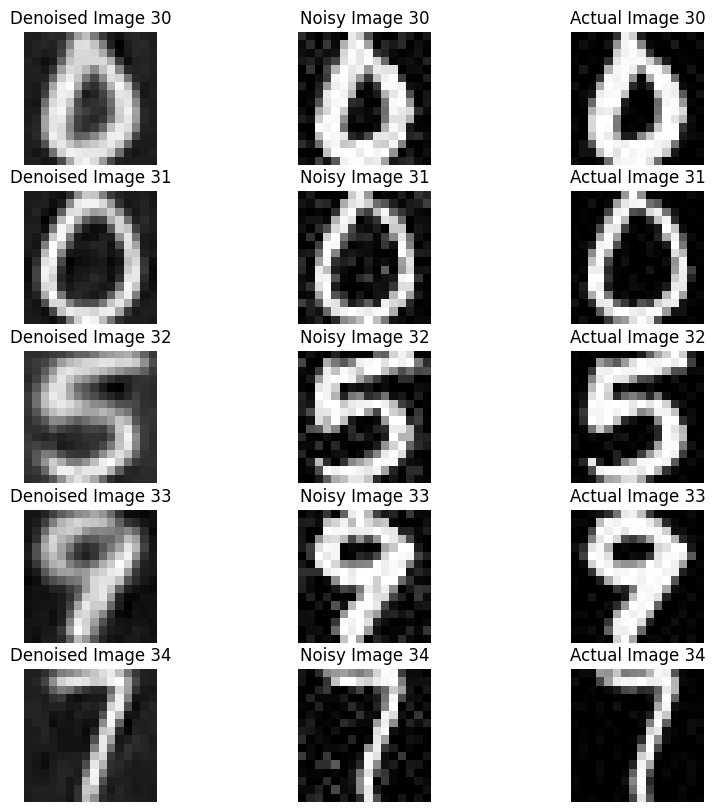

In [98]:
test_noisy_images = X_test.reshape((-1, 16, 16))
test_actual_images = y_test.reshape((-1, 16, 16))

fig, axes = plt.subplots(5, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(0, 15, 3):
    axes[i].imshow(denoised_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Denoised Image {i//3+30}")
    axes[i].axis('off')

    axes[i+1].imshow(test_noisy_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i+1].set_title(f"Noisy Image {i//3+30}")
    axes[i+1].axis('off')

    axes[i+2].imshow(test_actual_images[i//3+30].reshape(16, 16), cmap='gray')
    axes[i+2].set_title(f"Actual Image {i//3+30}")
    axes[i+2].axis('off')


plt.show()